# Decision Tree

This week we're looking at training decision tree classifiers in Python. The package you will be interested in is scikit-learn

In [2]:
import sklearn as sk
import pandas as pd

As before we want to read in the data file. Change the first line below to point to your iris dataset. Mine has the row number as the initial column which we need to deal with later ...

In [5]:
DATAFILE = '/Users/990679/OneDrive - UTS/uni/teaching/IDA20S/lectures/week7/iris.csv'
# iris = pd.read_csv(DATAFILE)

In [104]:
iris.head()

,Row,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In scikit-learn we want to deal with the data attributes and the target separately. Also, we cannot deal with a categorical target, so let's change it to numeric. There are lots of ways to do this but I'm just going to use a dictionary. 

In [46]:
targets = iris['Species'].unique()
target2code = dict(zip(targets, range(len(targets))))
target2code

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

`X` will be all the data excluding the target attribute. `y` will be all the target values converted to numeric.

In [4]:
X = iris.iloc[:,1:-1] # strip off the row number and target.

y = iris.iloc[:,-1].copy() # don't want to overwrite the original 
y = y.apply(lambda x: target2code[x]) # convert each 

# y = pd.Series([target2code[i] for i in iris.iloc[:,-1]]) # <--- is another way to do it.

print(X)
# y

NameError: name 'iris' is not defined

So, now we have the data in X and y and we have converted the target names to numbers.

The next thing to do is to build our classification decision tree. We use the `DecisionTreeClassifier` class in the `sklearn.tree` package.

So we create our `DecisionTreeClassifier`, then we `fit` it against our data. There are some useful variables you can pass to the constructor, but I'll let you explore that yourselves.

In [111]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X, y);

Now we can use the classifer to make predictions. Here are two examples.

In [112]:
# clf.predict([[5.1, 3.5, 1.4, 0.2]])
# clf.predict([[5.0, 2.0, 4.0, 1.5]])

We can plot the tree using the `plot_tree` function of `tree`. You'll need to read through the doco to learn how to plot it a bit bigger (essentially you need to set the figure size in matplotlib like we did last week, then pass in the ax).

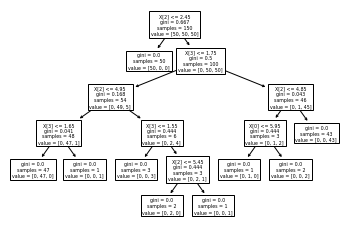

In [115]:
tree.plot_tree(clf);

We can see which attributes are the most important to the problem.

In [116]:
clf.feature_importances_

array([0.01333333, 0.        , 0.56405596, 0.42261071])

We can predict the probability for each class.

In [117]:
#clf.predict_proba([[5.1, 3.5, 1.4, 0.2]])
clf.predict_proba([[5.0, 2.0, 4.0, 1.5]])

array([[0., 1., 0.]])

... and we can make a nice text plot of the tree. Note: we need to pass in the attribute names (again excluding the row number and the species attribute).

In [118]:
features = iris.columns[1:-1].to_list()
r = tree.export_text(clf, feature_names=features)

In [119]:
print(r)

|--- Petal.Length <= 2.45
|   |--- class: 0
|--- Petal.Length >  2.45
|   |--- Petal.Width <= 1.75
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- Petal.Width <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- Petal.Width >  1.65
|   |   |   |   |--- class: 2
|   |   |--- Petal.Length >  4.95
|   |   |   |--- Petal.Width <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- Petal.Width >  1.55
|   |   |   |   |--- Petal.Length <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Petal.Length >  5.45
|   |   |   |   |   |--- class: 2
|   |--- Petal.Width >  1.75
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- Sepal.Length <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- Sepal.Length >  5.95
|   |   |   |   |--- class: 2
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: 2



Of course, we're using the entire dataset to train our decision tree, which we know is the wrong thing to do.

Instead, we should split the dataset into a training and test set. There is a nifty function in the `sklearn.model_selection` package called `train_test_split` that allows us to partition the dataset. Details are here: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

And we need the confusion_matrix function as well.  

[[15  0  0]
 [ 0 17  0]
 [ 0  4  9]]


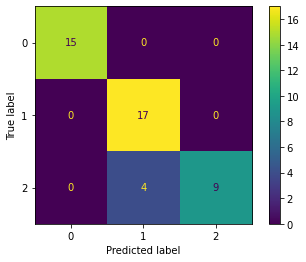

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

mat = confusion_matrix(y_test, y_pred)
print(mat)

plot_confusion_matrix(clf, X_test, y_test);

That should be enough to get you started with decision trees. There is loads more you can explore and play with. Have fun! 